In [3]:
# python integration with wwt
%pip install mplfinance matplotlib yfinance

Note: you may need to restart the kernel to use updated packages.


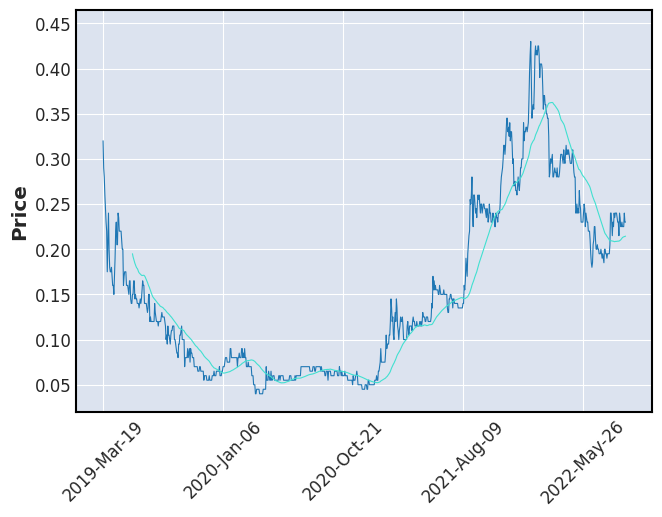

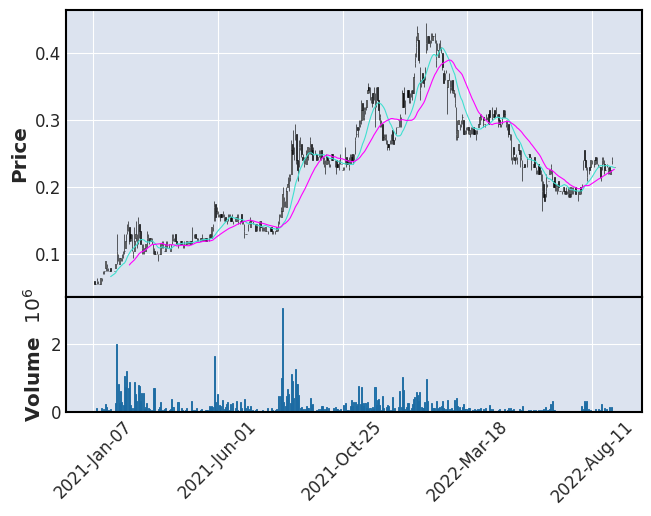

In [15]:
# read stock data from wwt.v and plot it using mplfinance
import yfinance as yf
import mplfinance as mpf
sp = yf.Ticker("WWT.V")
# Consider grabbing for valid date index instead
daily = sp.history(start="2019-01-02")
mpf.plot(daily,type='line', mav=50)

last_year = sp.history(start="2021-01-07")
mpf.plot(last_year,type='candle',mav=(15, 30),volume=True)

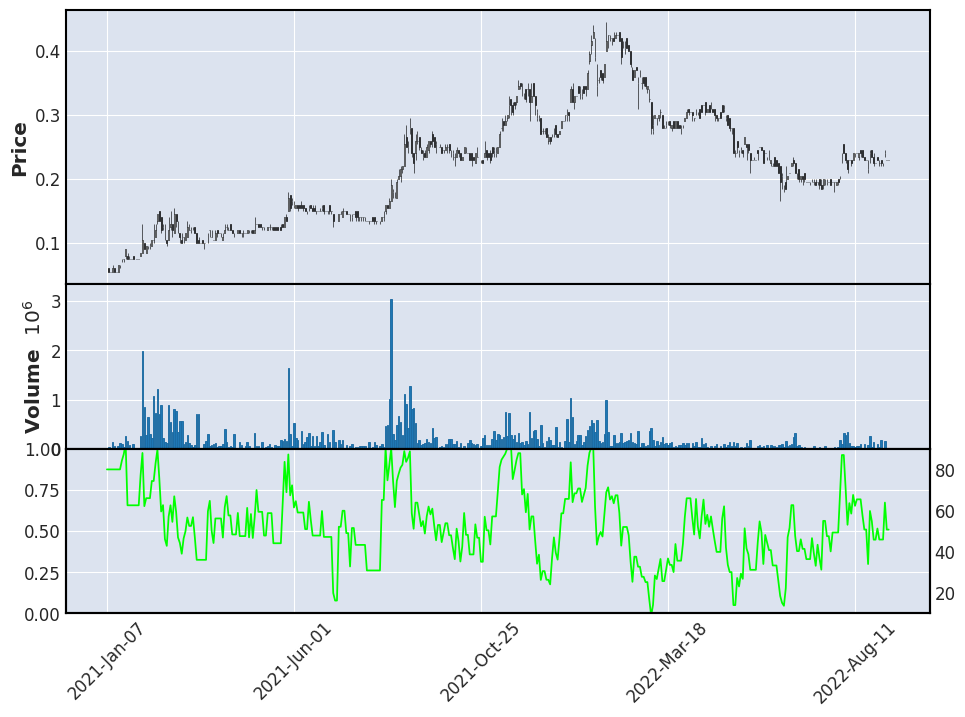

In [17]:
import numpy as np
def relative_strength(prices, n=14):
    """
    compute the n period relative strength indicator
    http://stockcharts.com/school/doku.php?id=chart_school:glossary_r#relativestrengthindex
    http://www.investopedia.com/terms/r/rsi.asp
    """
    deltas = np.diff(prices)
    seed = deltas[:n + 1]
    up = seed[seed >= 0].sum() / n
    down = -seed[seed < 0].sum() / n
    rs = up / down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100. / (1. + rs)

    for i in range(n, len(prices)):
        delta = deltas[i - 1]  # cause the diff is 1 shorter

        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up * (n - 1) + upval) / n
        down = (down * (n - 1) + downval) / n

        rs = up / down
        rsi[i] = 100. - 100. / (1. + rs)

    return rsi

last_year['rsi'] = relative_strength(last_year['Close'],n=7)

apd = mpf.make_addplot(last_year['rsi'],panel=2,color='lime',ylim=(10,90),secondary_y=True)

mpf.plot(last_year,type='candle',volume=True,figscale=1.5,addplot=apd,panel_ratios=(1,0.6))